## K-Nearest Neighbours Classification [KNN]:

- non-parametric, supervised classifier.
- Uses proximity to make classifications
- *k* in k-NN is number of nearby points to consider while making decision.

Choosing the value of 'k':
- Data having lots of noise/outliers, then can take larger k.
- If the k is too large then model may become simple & miss imp. patterns [underfitting].
- Statistical Methods: Cross-Validation, Elbow Method, & Odd values for k.

## Distance Metrics used:

- Distance metrics used for identification of nearest neighbours.

**1. Euclidean Distance:**

- straight line dist. b/w 2 points in a plane.
- shortest path.

    $dist(x, X(i))$ = $\sqrt{\sum_{j=1}^{d} (x_{j} - X_{i_{j}})^2 }$

    - $x$ is the test point here [features: X_test]
    - $X(i)$ it the $i^th$ training data point [features: X_train]
    - $d$ total number of features [$j^th$ feature]

**2. Manhattan Distance:**

- Total dist. travelling by following the grid (only move along horizontal & vertical direction).

    $d(x, y) = \sum_{i=1}^{n} {|x_i - y_i|}$

**3. Minkowski Distance:**

- This is combination of both Euclidean Distance & Manhattan distance.
- This is kinda flexible dist. can represent either Euclidean or Manhattan Distance.

    $d(x,y) = (\sum_{i=1}^{n} (x_i - y_i)^p)^{1/p}$


    - If $p = 2$, formula will be same as Euclidean Distance.

    - If $p = 1$, formula will be same as Mahnattan Distance.

### KNN Algorithm steps:

1. Choose optimal value of 'k'.
2. Calculate the Distance [To calculate the similarity b/w target & training data points].
3. Finding the Nearest Neighbours, the $k$ datapoints with the smallest distances to the target point.
4. Voting base selection. [Algorithm looks at which category the neighbours belong & picks the one that appears the most]

### Building KNN From Scratch:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

In [139]:
# Generating Datasets
X, y = make_classification(
    n_samples=2000,
    n_features=10,
    n_informative=2,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=30
)

In [140]:
X.shape

(2000, 10)

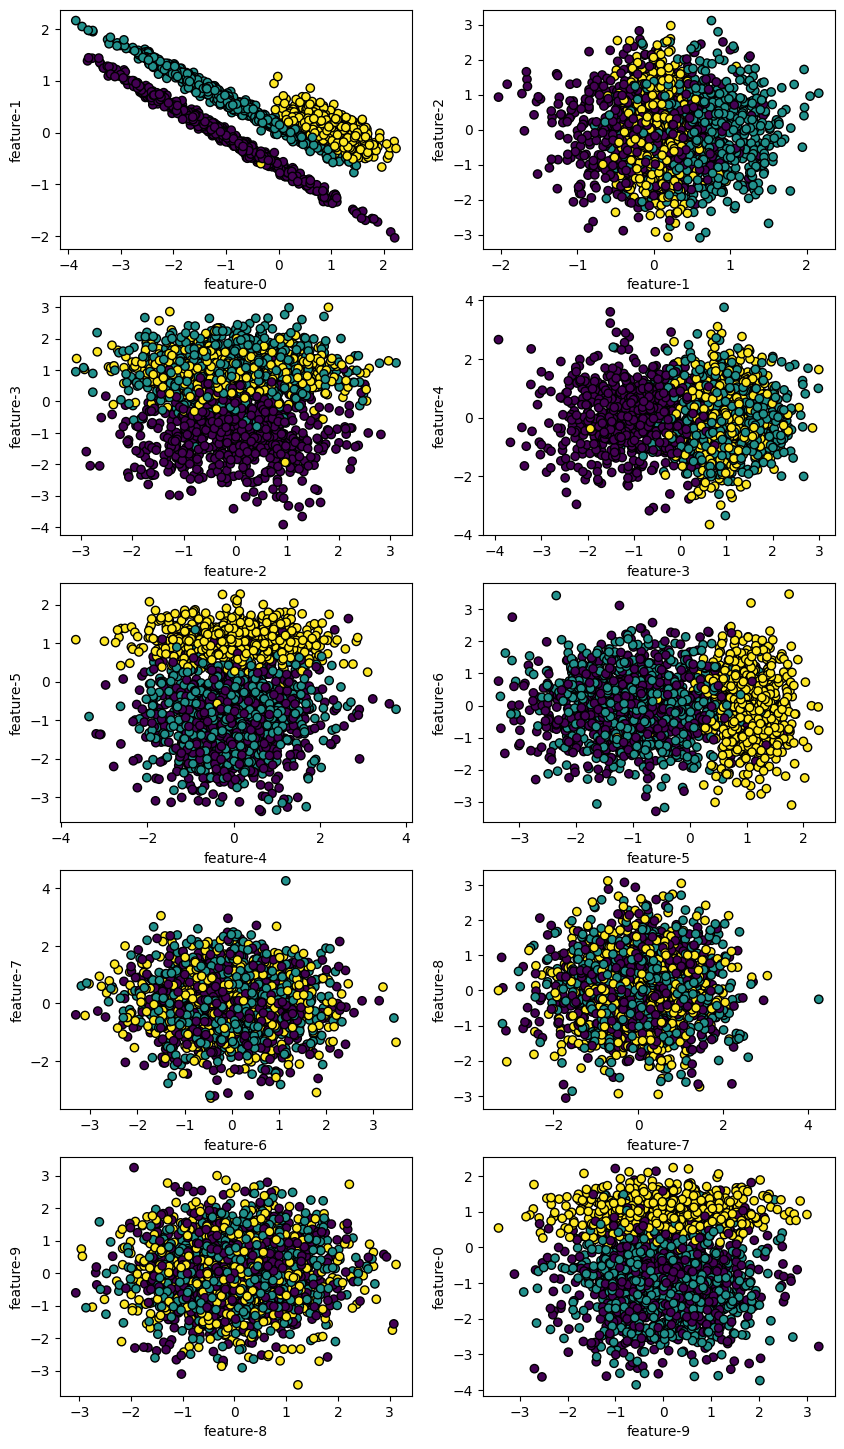

In [141]:
# Visualization of generated classification samples.
fig, axes = plt.subplots(nrows = 5, ncols=2, figsize=(10,18))

for i, ax in zip(range(10), axes.ravel()):
    ax.scatter(X[:,i], X[:, (i+1 if i!=9 else 0)], c = y, edgecolor='k')    
    ax.set_xlabel(f"feature-{i}")
    ax.set_ylabel(f"feature-{i+1 if i!=9 else 0}")
plt.show()

In [142]:
# Splitting the train test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.3)

print(f"""X_train shape: {X_train.shape}
X_test shape: {X_test.shape}""")

X_train shape: (1400, 10)
X_test shape: (600, 10)


K - Nearest Neighbours Modules Building:

In [143]:
from collections import Counter
from typing import Literal

In [144]:
class KNNClassifier:
    def __init__(self, n_neighbours: int, metric: Literal['euclidean', 'manhattan'] = 'euclidean'):
        self.k = n_neighbours
        self.metric = metric
        
    def _euclidean_distance(self, X_test, X_train):
        return np.sqrt(np.sum(np.square(X_test -  X_train)))
    
    def _manhattan_distance(self, X_test, X_train):
        return np.sum(np.abs(X_test - X_train))
    
    def _algorithm(self, test_point):
        
        distances = []
        # self._euclidean_distance(x, x_train) for x_train in self.X_train
        if self.metric == 'euclidean':
            for i in range(len(self.X_train)):
                distances.append((
                # self._manhattan_distance(test_point, self.X_train[i]),
                self._euclidean_distance(test_point, self.X_train[i]),
                self.y_train[i]
                ))
        elif self.metric == 'manhattan':
            for i in range(len(self.X_train)):
                distances.append((
                self._manhattan_distance(test_point, self.X_train[i]),
                # self._euclidean_distance(test_point, self.X_train[i]),
                self.y_train[i]
                ))
            
        
        
        # nearest points
        nearest_points = sorted(distances, key=lambda x: x[0])[:self.k]
        
        k_labels = [label for _, label in nearest_points]
        
        # most frequent/common [Voting based selection]
        most_common = Counter(k_labels).most_common(1)[0][0] 
        return most_common
        
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        return [self._algorithm(test_point) for test_point in X_test]
    
    
    def mse(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean((y_pred - y_test)**2)
    
    def score(self, X_test, y_test):
        """accuracy = (TP+TN) / (TP+TN+FP+FN)"""
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

### Testing the KNN Model with euclidean distance and manhattan distance:

In [145]:
# Initializing the models. 
knn1 = KNNClassifier(n_neighbours=3, metric='euclidean')
knn2 = KNNClassifier(n_neighbours=3, metric='manhattan')

In [146]:
# Fitting the Train data to the models...

knn1.fit(X_train, y_train)
knn2.fit(X_train, y_train)

In [147]:
# Get the test data predictions...
y_pred_eucl = knn1.predict(X_test)
y_pred_manh = knn2.predict(X_test)

**Calculating the Accuracy and Mean Squared Error of the Test Data.**

In [148]:
# Euclidean Distance Based KNN model.
MSE_eucl = knn1.mse(X_test, y_test)
accu_eucl = knn1.score(X_test, y_test)

# Manhattan Distance based KNN model.
MSE_manh = knn2.mse(X_test, y_test)
accu_manh = knn2.score(X_test, y_test)

In [149]:
print(f"""
Euclidean method Scores:
    MSE: {float(MSE_eucl)}
    Accuracy: {float(accu_eucl)}
{'-'*75}
Manhattan method Scores:
    MSE: {float(MSE_manh)}
    Accuracy: {float(accu_manh)}
""")


Euclidean method Scores:
    MSE: 0.06
    Accuracy: 0.945
---------------------------------------------------------------------------
Manhattan method Scores:
    MSE: 0.041666666666666664
    Accuracy: 0.9633333333333334



### KNN Using scikit-learn:

In [151]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
knn_sklearn = KNeighborsClassifier(n_neighbors=3)

knn_sklearn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [156]:
y_pred_sklearn = knn_sklearn.predict(X_test)

acc_sklearn = knn_sklearn.score(X_test, y_test)
print(f"""In-built KNN (sklearn's model) Scores (same data):
    Accuracy: {float(acc_sklearn)}
""")

In-built KNN (sklearn's model) Scores (same data):
    Accuracy: 0.945



---
**Classification Reports:**


In [ ]:
# Classification report:

from sklearn.metrics import classification_report

print("KNN Classification Report: [from in-built Scikit-learn]")
print(classification_report(y_test, y_pred=y_pred_sklearn))
print('-'*75)
print("KNN Classification Report [dev. from scratch] using Euclidean Distance Formlua:")
print(classification_report(y_test, y_pred=y_pred_eucl))
print('-'*75)
print("KNN Classifiaxction report [dev. from scratch] using Manhattan Distance Formula:")
print(classification_report(y_test, y_pred=y_pred_manh))


KNN Classification Report: [from in-built Scikit-learn]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       201
           1       0.93      0.91      0.92       202
           2       0.92      0.94      0.93       197

    accuracy                           0.94       600
   macro avg       0.95      0.95      0.94       600
weighted avg       0.95      0.94      0.95       600

---------------------------------------------------------------------------
KNN Classification Report [dev. from scratch] using Euclidean Distance Formlua:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       201
           1       0.93      0.91      0.92       202
           2       0.92      0.94      0.93       197

    accuracy                           0.94       600
   macro avg       0.95      0.95      0.94       600
weighted avg       0.95      0.94      0.95       600

--------------------------

---

By Kirtan Ghelani $@SculptSoft$